In [2]:
import numpy as np
import librosa
import noisereduce as nr
import os
import matplotlib.pyplot as plt
from noisereduce.generate_noise import band_limited_noise
import scipy.signal as sg

In [3]:
path = os.getcwd() + "/Desktop/Delfini"

In [4]:
audio_data, sr = librosa.load("20211121_050319_192.wav", sr=192000)

In [5]:
# duration = n_frame / freq
L = audio_data.shape[0] / sr 

In [8]:
filter = sg.butter(4, [32000,50000], btype = 'bandpass', analog = False, output='sos',fs=sr)
filtered = sg.sosfilt(filter, audio_data)

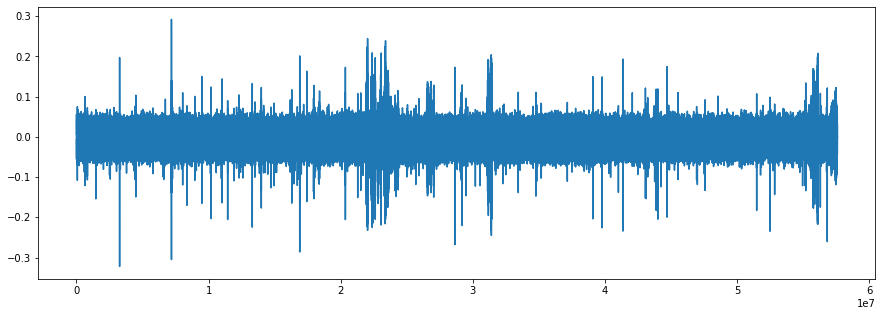

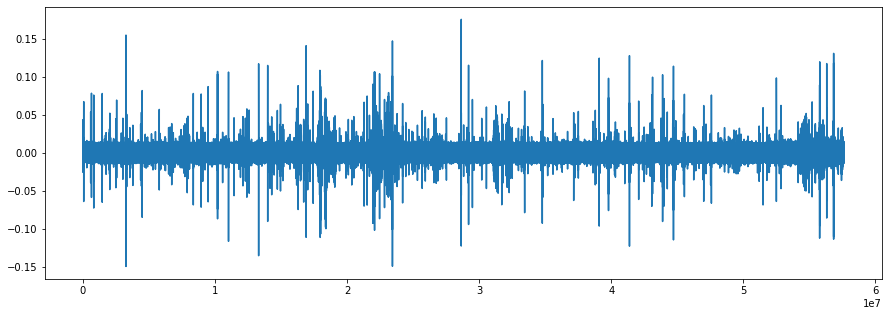

In [7]:
plt.figure(figsize=(15,5))
plt.plot(audio_data)
plt.show()
plt.figure(figsize=(15,5))
plt.plot(filtered)
plt.show()

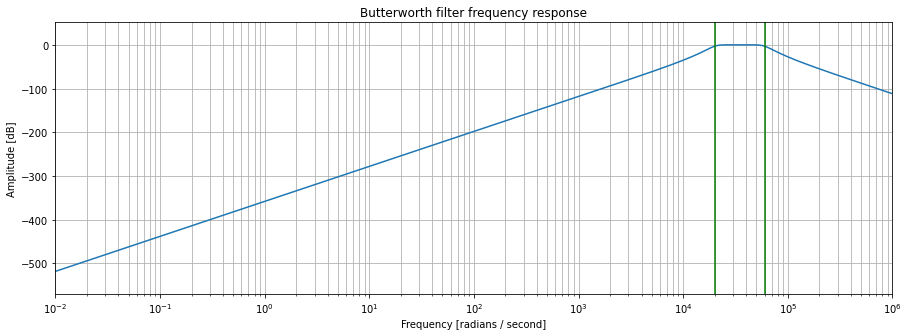

In [8]:
b, a = sg.butter(4, [20000,60000], btype = 'bandpass', analog = True, output='ba')
w, h = signal.freqs(b, a)
plt.figure(figsize=(15,5))
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(20000, color='green') # cutoff frequency
plt.axvline(60000, color='green')
plt.show()

In [ ]:
np.reshape(filtered,(1,filtered.shape[0]))
clips = np.empty(shape=(1,sr))
w = int(sr/2)

for i in range(0,filtered.shape[0],sr):
    if i == 0:
        clips = np.vstack([clips, filtered[i:192000+i]])
    else:
        clips = np.vstack([clips, filtered[(i-w):(i+w)]])

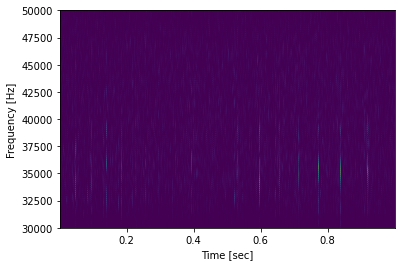

In [21]:
from scipy import signal

for i in range(clips.shape[0]):
    f, t, Sxx = signal.spectrogram(clips[100], sr, nfft=1024)
    plt.Figure(figsize=(15,5))
    plt.pcolormesh(t, f, Sxx, shading='gouraud')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.ylim([30000,50000])
    #plt.savefig(os.path.join(os.getcwd(), 'clips', str(i)))
    plt.show()
    #plt.close()
    break
    